In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

# đổi đường dẫn tới đúng folder của bạn
os.chdir('/content/drive/MyDrive/Python_assignment/svm')

# kiểm tra xem có file không
print(os.getcwd())
!ls

/content/drive/MyDrive/Python_assignment/svm
svm.ipynb


In [5]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [12]:
cal_data = fetch_california_housing()

X = cal_data.data      # features
y = cal_data.target    # labels (giá nhà theo đơn vị 100k USD)

In [13]:
# 2) Tách train/test theo code bạn muốn
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.1,
    random_state=20
)

print(
    "The size of training data is: {} \nThe size of testing data is: {}".format(
        len(X_train), len(X_test)
    )
)

The size of training data is: 18576 
The size of testing data is: 2064


In [15]:
# 3) Chuẩn hóa dữ liệu
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled  = scaler_X.transform(X_test)

# y phải reshape rồi mới scale
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

In [16]:
# 4) Train mô hình SVR
model = SVR(
    kernel="rbf",
    C=10,
    gamma="scale",
    epsilon=0.1
)
model.fit(X_train_scaled, y_train_scaled)

SVR(C=10)

In [17]:
# 5) Dự đoán
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

In [18]:
# 6) Đánh giá
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 0.3755718716927816
MSE: 0.315407972774292
RMSE: 0.5616119414455965


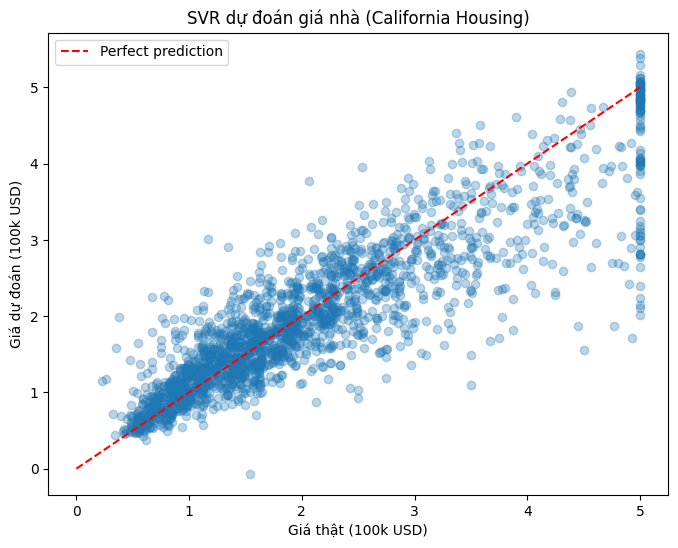

In [19]:
# 7) Vẽ biểu đồ thực tế vs dự đoán
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([0, 5], [0, 5], "r--", label="Perfect prediction")
plt.xlabel("Giá thật (100k USD)")
plt.ylabel("Giá dự đoán (100k USD)")
plt.title("SVR dự đoán giá nhà (California Housing)")
plt.legend()
plt.show()

In [21]:
# Ví dụ 2: SVM nhận diện chữ số viết tay (Digits dataset)

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt







In [22]:

# 1) Load dữ liệu chữ số
digits = load_digits()
X = digits.data     # mỗi sample: 64 features (8x8 ảnh flatten)
y = digits.target   # nhãn: 0..9

print("Shape dữ liệu:", X.shape)   # (1797, 64)




Shape dữ liệu: (1797, 64)


In [23]:
# 2) Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [24]:
# 3) Chuẩn hóa dữ liệu (nên làm với SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [25]:
# 4) Khởi tạo và train SVM với kernel RBF
svm_clf = SVC(
    kernel="rbf",     # kernel RBF (phi tuyến)
    C=10.0,           # tăng C để fit tốt hơn
    gamma="scale",    # gamma mặc định
    random_state=42
)

svm_clf.fit(X_train_scaled, y_train)


SVC(C=10.0, random_state=42)

In [26]:

# 5) Dự đoán & đánh giá
y_pred = svm_clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:")
print(classification_report(y_test, y_pred))

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.98

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.96      0.98      0.97        46
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        46
           4       0.96      0.98      0.97        45
           5       0.98      0.98      0.98        46
           6       0.98      1.00      0.99        45
           7       0.96      0.98      0.97        45
           8       1.00      0.93      0.96        43
           9       0.98      0.96      0.97        45

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

Confusion matrix:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  1  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 46  0  0  0  0  0  0]
 [ 0  0  0  0 44  0  0  1  0  0]
 [ 0  0  0  0  0 45

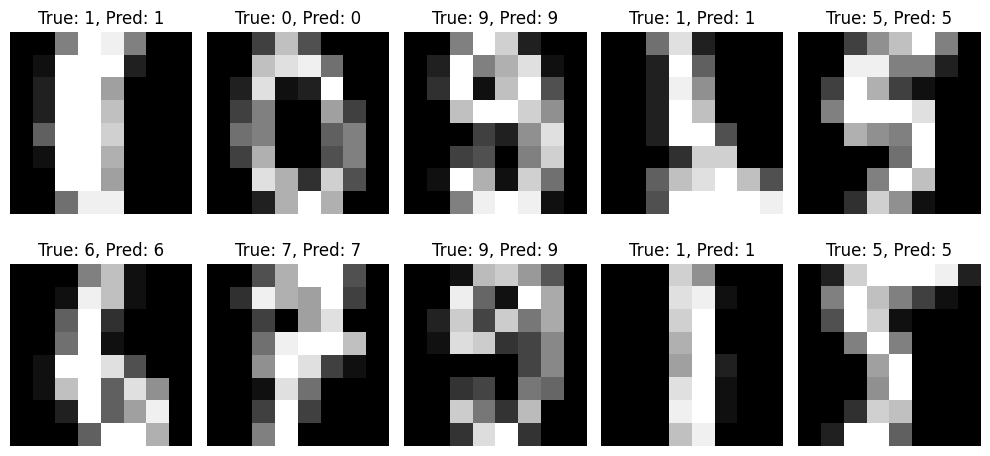

In [27]:
# 6) Hiển thị vài ảnh và dự đoán của model
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(X_test[i].reshape(8, 8), cmap="gray")
    axes[i].set_title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()